# The RavenPy interface to Raven

RavenPy can be used to call Raven from Python. At its most basic, existing configuration files can be used to launch Raven, but RavenPy is most useful when leveraging its templating system to configure models interactively.

## Basic usage using pre-existing configuration files

The simplest way to existing Raven users to use the wrapper is to pass existing configuration files to the `Raven` class.

In [1]:
from glob import glob
from pathlib import Path

# Needs to be absolute path.
# TODO: Add health check to make sure file exists.
TESTDIR = Path("/home/david/src/raven/tests/testdata/")
config = list((TESTDIR / "raven-gr4j-cemaneige").glob("*.rv?"))
forcing = TESTDIR / "raven-gr4j-cemaneige" / "Salmon-River-Near-Prince-George_meteo_daily.nc"
tuple(config)

(PosixPath('/home/david/src/raven/tests/testdata/raven-gr4j-cemaneige/raven-gr4j-salmon.rvh'),
 PosixPath('/home/david/src/raven/tests/testdata/raven-gr4j-cemaneige/raven-gr4j-salmon.rvt'),
 PosixPath('/home/david/src/raven/tests/testdata/raven-gr4j-cemaneige/raven-gr4j-salmon.rvi'),
 PosixPath('/home/david/src/raven/tests/testdata/raven-gr4j-cemaneige/raven-gr4j-salmon.rvp'),
 PosixPath('/home/david/src/raven/tests/testdata/raven-gr4j-cemaneige/raven-gr4j-salmon.rvc'))

In [2]:
from raven.models import Raven
model = Raven()
model.configure(config)
model(forcing)

In [3]:
model.hydrograph

<xarray.Dataset>
Dimensions:     (nbasins: 1, time: 209)
Coordinates:
  * time        (time) datetime64[ns] 1954-01-01 1954-01-02 ... 1954-07-28
    basin_name  (nbasins) object ...
Dimensions without coordinates: nbasins
Data variables:
    precip      (time) float64 ...
    q_sim       (time, nbasins) float64 ...
    q_obs       (time, nbasins) float64 ...
    q_in        (time, nbasins) float64 ...
Attributes:
    Conventions:  CF-1.6
    featureType:  timeSeries
    history:      Created by Raven
    description:  Standard Output


To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)



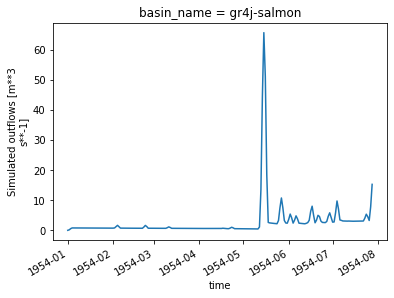

In [4]:
model.q_sim.plot()

## Using templated model emulators

Raven's framework can be used to emulate existing hydrological models. The Python wrapper offers at present 4 emulated models: GR4J-CemaNeige, HMETS, MOHYSE and HBV-EC. For each of these, templated configuration files are available to facilitate launching the model with options passed by Python at run-time.

In [5]:
import datetime as dt
from raven.models import GR4JCN, HMETS, MOHYSE, HBVEC
model = GR4JCN()
model(
    forcing,
    start_date=dt.datetime(2000, 1, 1),
    end_date=dt.datetime(2002, 1, 1),
    area=4250.6,
    elevation=843.0,
    latitude=54.4848,
    longitude=-123.3659,
    params=(0.529, -3.396, 407.29, 1.072, 16.9, 0.947),
)

Actual: degC
Expected: deg_C
Make sure to set linear_transform to perform conversion.
  warnings.warn(f"Units are not what Raven expects for {self.var}.\n"

Actual: degC
Expected: deg_C
Make sure to set linear_transform to perform conversion.
  warnings.warn(f"Units are not what Raven expects for {self.var}.\n"



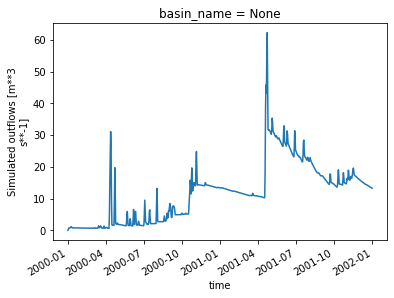

In [6]:
model.q_sim.plot()

Along with simulated discharge, Raven also outputs internal storage variables.

In [7]:
model.storage

<xarray.Dataset>
Dimensions:                    (time: 732)
Coordinates:
  * time                       (time) datetime64[ns] 2000-01-01 ... 2002-01-01
Data variables:
    rainfall                   (time) float64 ...
    snowfall                   (time) float64 ...
    Channel Storage            (time) float64 ...
    Reservoir Storage          (time) float64 ...
    Rivulet Storage            (time) float64 ...
    Surface Water              (time) float64 ...
    Cum. Losses to Atmosphere  (time) float64 ...
    Ponded Water               (time) float64 ...
    Soil Water[0]              (time) float64 ...
    Soil Water[1]              (time) float64 ...
    Soil Water[2]              (time) float64 ...
    Soil Water[3]              (time) float64 ...
    Snow                       (time) float64 ...
    Convolution Storage[0]     (time) float64 ...
    Convolution Storage[1]     (time) float64 ...
    Total                      (time) float64 ...
    Cum. Input                 (time) float64 ...
    Cum. Outflow               (time) float64 ...
    MB Error                   (time) float64 ...
Attributes:
    Conventions:          CF-1.6
    featureType:          timeSeries
    history:              Created on 2020-07-16 14:20:22 by Raven
    description:          Standard Output
    title:                Simulated river discharge
    references:           Craig J.R. and the Raven Development Team Raven use...
    comment:              Raven Hydrological Framework version 2.9 rev#254
    model_id:             gr4jcn
    time_frequency:       day
    time_coverage_start:  2000-01-01 00:00:00
    time_coverage_end:    2002-01-01 00:00:00